### Matrix indexing: Modulo Operator vs Floor Division

In [24]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

In [25]:
n = 3
X = np.zeros((n,n))
Y = np.zeros((n,n))

for i in range(n*n):
    row = i // n
    col = i %  n
    X[row,col] = col
    Y[row,col] = row

print(X);print(Y)

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


### Matrix fill using Zip

In [26]:

def fill_matrix_1(Ny,Nx):
    x   = np.linspace(0,100,Nx) # Ncols
    y   = np.linspace(0,100,Ny) # Nrows
    X,Y = np.meshgrid(x,y)
    C   = np.random.rand(Ny,Nx)
    M   = np.zeros_like(X)
    for row in range(Ny):
        for col in range(Nx):
            M[row,col] = x[col]*y[row]*C[row,col]

    return X,Y,M

def fill_matrix_2(Nx,Ny):
    x   = np.linspace(0,100,Nx) # Ncols
    y   = np.linspace(0,100,Ny) # Nrows
    X,Y = np.meshgrid(x,y)
    C   = np.random.rand(Ny,Nx)
    M   = []
    for x,y,c in zip(X.flatten(),Y.flatten(),C.flatten()):
            M.append(x*y*c)
    
    return X,Y,np.reshape(M,(Ny,Nx))

k   = 100
Nx  = 7*k
Ny  = 5*k

# %timeit fill_matrix_1(Nx,Ny)
# %timeit fill_matrix_2(Nx,Ny)


## Mapping with non-linear functions 

In [27]:
def map_fun(a,b,n=10,mode='log',Npoints=100,decrease_diff=False):
    """ xn[0,1] --> xm[a,b]
        decrease_diff     not decrease_diff  
        ################################   
        1-(x-1)**2  even  |   x**2,x**3
        1+(x-1)**3  odd   |                 
                          |
        log10(9*x+1)      |  (10**x-1)/9      """
        
    
    xn= np.linspace(0,1,Npoints)
    
    if mode == 'log':
       if decrease_diff: xs=np.emath.logn(n, (n-1)*xn+1)   
       else:             xs=(n**(xn)-1)/(n-1)  
    if mode == 'exp':
        if decrease_diff:  xs = 1 -(-1)**n*(xn-1)**n
        else:              xs = xn**n

    xm = (b-a)*xs + a

    return xm,xn

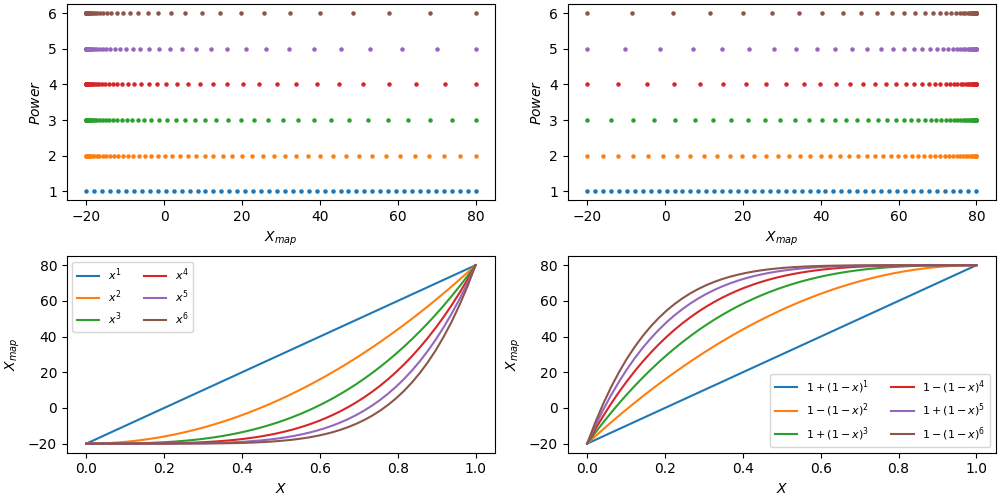

In [28]:
colors = ['#17becf','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, ax = plt.subplots(2,2,figsize=(10,5),constrained_layout=True)
ax = ax.flatten()
a  = -20
b  = 80
Np = 50
N  = np.arange(1,7)
for row in range(2):
    for n in N:
        if row==0: 
            xmap,xnorm = map_fun(a,b,n=n,mode='exp',Npoints=Np,decrease_diff=False)
            ax[row].scatter(xmap,n*np.ones_like(xmap),s=5,c=colors[n]) 
            ax[row].set_ylabel('$Power$');ax[row].set_xlabel('$X_{map}$');ax[row].set_yticks(N)

            ax[row+2].plot(xnorm,xmap,label=f'$x^{n}$');ax[row+2].set_ylabel('$X_{map}$')
            ax[row+2].set_yticks(np.arange(a,b+10,20));ax[row+2].set_xlabel('$X$')
            ax[row+2].legend(fontsize=8,ncols=2)

        if row==1:
            xmap,xnorm = map_fun(a,b,n=n,mode='exp',Npoints=Np,decrease_diff=True)
            ax[row].scatter(xmap,n*np.ones_like(xmap),s=5,c=colors[n]) 
            ax[row].set_ylabel('$Power$');ax[row].set_xlabel('$X_{map}$');ax[row].set_yticks(N)

            if -(-1)**n>0:
               label = f'$1+(1-x)^{n}$'
            else:
               label = f'$1-(1-x)^{n}$'
            ax[row+2].plot(xnorm,xmap,label=label) 
            ax[row+2].set_ylabel('$X_{map}$')
            ax[row+2].set_yticks(np.arange(a,b+10,20))
            ax[row+2].set_xlabel('$X$')
            ax[row+2].legend(fontsize=8,ncols=2)

plt.show()

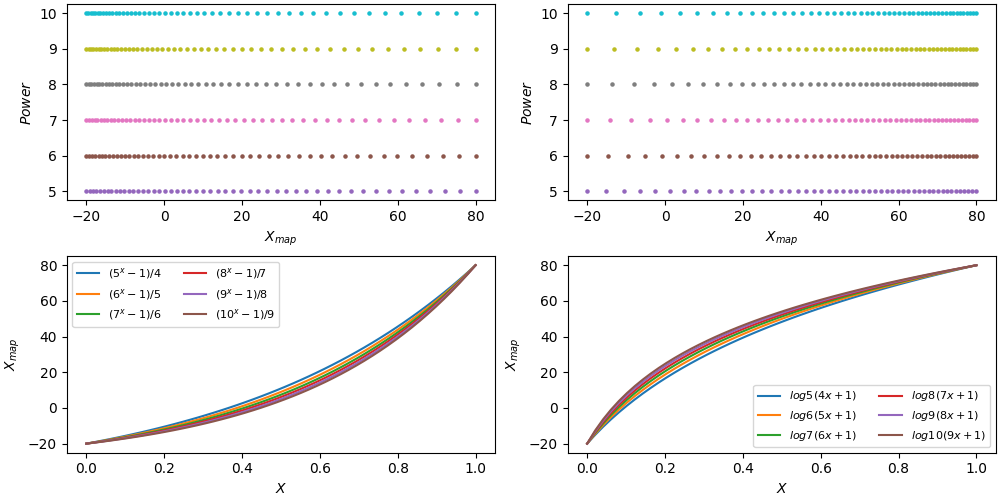

In [29]:
fig, ax = plt.subplots(2,2,figsize=(10,5),constrained_layout=True)
ax = ax.flatten()
a  = -20
b  = 80
Np = 50
N  = np.arange(5,10+1)
for row in range(2):
    for n in N:
        if row==0: 
            xmap,xnorm = map_fun(a,b,n=n,mode='log',Npoints=Np,decrease_diff=False)
            ax[row].scatter(xmap,n*np.ones_like(xmap),s=5,c=colors[n]) 
            ax[row].set_ylabel('$Power$');ax[row].set_xlabel('$X_{map}$');ax[row].set_yticks(N)
            k=n-1
            ax[row+2].plot(xnorm,xmap,label=f'$({n}^x-1)/{k}$');ax[row+2].set_ylabel('$X_{map}$')
            ax[row+2].set_yticks(np.arange(a,b+10,20));ax[row+2].set_xlabel('$X$')
            ax[row+2].legend(fontsize=8,ncols=2)

        if row==1:
            xmap,xnorm = map_fun(a,b,n=n,mode='log',Npoints=Np,decrease_diff=True)
            ax[row].scatter(xmap,n*np.ones_like(xmap),s=5,c=colors[n]) 
            ax[row].set_ylabel('$Power$');ax[row].set_xlabel('$X_{map}$');ax[row].set_yticks(N)
            k=n-1
            ax[row+2].plot(xnorm,xmap,label=f'$log{n}({k}x+1)$') 
            ax[row+2].set_ylabel('$X_{map}$')
            ax[row+2].set_yticks(np.arange(a,b+10,20))
            ax[row+2].set_xlabel('$X$')
            ax[row+2].legend(fontsize=8,ncols=2)

plt.show()

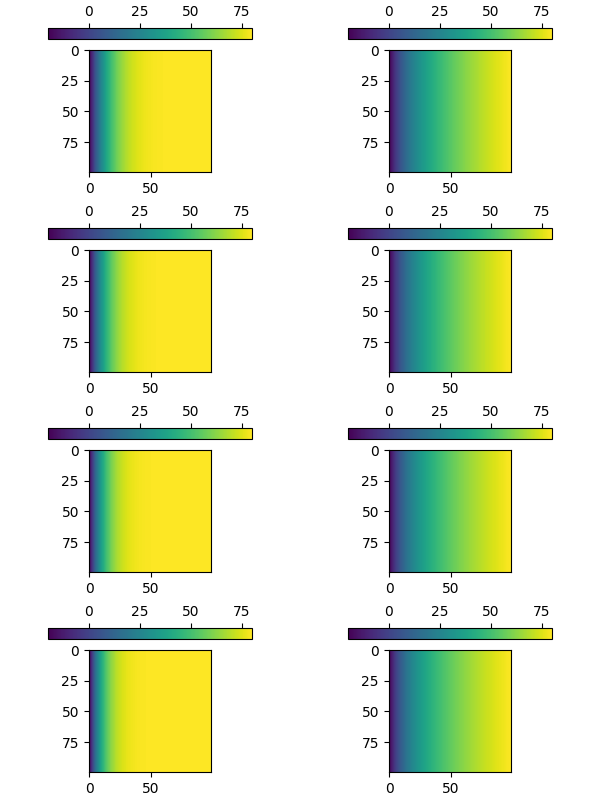

In [30]:
fig, ax = plt.subplots(4,2,figsize=(6,8),constrained_layout=True)
Nxy = 100
a   = -20
b   = 80
y   = np.linspace(a,b,Nxy)
N   = np.arange(6,10+1)
decrease_diff = True
for r in range(4):
    for c in range(2):
        if c==0:
            x,_ = map_fun(a,b,n=N[r],mode='exp',Npoints=Nxy,decrease_diff=decrease_diff )
            X,_ = np.meshgrid(x,y)
            im = ax[r][c].imshow(X)
            fig.colorbar(im, ax=ax[r][c],location='top', shrink=0.7)
        if c==1:
            x,_ = map_fun(a,b,n=N[r]+4,mode='log',Npoints=Nxy,decrease_diff=decrease_diff )
            X,_ = np.meshgrid(x,y)
            im=ax[r][c].imshow(X)
            fig.colorbar(im, ax=ax[r][c],location='top', shrink=0.7)

plt.show()